# Problem Statement:

<font color=blue> To create a Linear Regression Model to predict the sale price for the Ames Iowa Housing based on the train dataset given.<br>

<font color=red>
Is it clear what the student plans to do?<br>
What type of model will be developed?<br>
How will success be evaluated?<br>
Is the scope of the project appropriate?<br>
Is it clear who cares about this or why this is important to investigate?<br>
Does the student consider the audience and the primary and secondary stakeholders?<br>

During basic EDA, you identify many missing values in a column/feature.
You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.
You impute a reasonable value for the missing value.
You plot the distribution of your feature.
You realize what you imputed has negatively impacted your data quality.
You cycle back, re-load your clean data, re-think your approach, and find a better solution.
Then you move on to your next feature. There are dozens of features in this dataset.

Figuring out programmatically concise and repeatable ways to clean and explore your data will save you a lot of time.


# Executive Summary

<font color=blue> 
### Contents:
- [Import Library](#Import-Library)
- [Import Read Train CSV](#Import-and-Read-CSV-File-for-Train-Dataset)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis and Exploratory Visualization](#EDA-and-Exploratory-Visualizations)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
    
- [Descriptive and Inferential Statistics????](#Descriptive-and-Inferential-Statistics)
- [Outside Research???](#Outside-Research)
- [Conclusions and Recommendations](#Conclusion-and-Recommendations)

# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Import and Read CSV File for Train Dataset

In [2]:
train_csv='./datasets/train.csv'
train=pd.read_csv(train_csv)

Set option to view all columns

In [3]:
pd.set_option('display.max_columns', 500)

Preview 2 rows of train dataset

In [4]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# Data Cleaning

<font color=red>
Are missing values imputed appropriately?<br>
Are distributions examined and described?<br>
Are outliers identified and addressed?<br>

Are steps taken during data cleaning and EDA framed appropriately?<br>

<font color=blue>
Are appropriate summary statistics provided?<br>

<font color=red>Decide how to impute null values.<br>
Decide how to handle outliers.<br><br><br><br><br>
Do you want to combine any features?<br>
Do you want to have interaction terms?<br>
Do you want to manually drop collinear features?<br>

Check train dataset's shape

In [5]:
train.shape

(2051, 81)

To get descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [6]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Check train dataset data type and if there's any null values

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

To view unique value,and unique value count for each columns

In [8]:
for c in train.columns:
    print ("---- %s ---" % c)
    print (train[c].value_counts())
    print('Unique_Value_Count: '+ str((len(train[c].unique()))))
    print(train[c].unique())

---- Id ---
2047    1
2787    1
1058    1
1060    1
1062    1
1066    1
1068    1
1070    1
1072    1
1074    1
1076    1
1078    1
1080    1
1082    1
1084    1
1086    1
1088    1
1090    1
1094    1
1096    1
1098    1
1100    1
1102    1
1104    1
1106    1
1108    1
1110    1
1118    1
1120    1
1124    1
       ..
2536    1
471     1
473     1
2522    1
475     1
2524    1
477     1
2526    1
479     1
2528    1
2530    1
485     1
2534    1
487     1
489     1
2556    1
491     1
2540    1
493     1
2542    1
495     1
2544    1
497     1
2546    1
2548    1
2550    1
2552    1
505     1
507     1
2049    1
Name: Id, Length: 2051, dtype: int64
Unique_Value_Count: 2051
[109 544 153 ... 916 639  10]
---- PID ---
532351060    1
535303150    1
909250210    1
905377130    1
527403020    1
535452060    1
923252080    1
535455090    1
909131125    1
534476150    1
528290170    1
903202170    1
905201020    1
903456130    1
923228290    1
923252100    1
905201030    1
535152010    1
909

['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
---- Mas Vnr Type ---
None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
Unique_Value_Count: 5
['BrkFace' 'None' nan 'Stone' 'BrkCmn']
---- Mas Vnr Area ---
0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
16.0        9
72.0        9
108.0       9
210.0       9
40.0        8
132.0       8
170.0       7
186.0       7
144.0       7
178.0       6
256.0       6
84.0        6
340.0       6
140.0       6
60.0        6
203.0       6
128.0       6
148.0       5
272.0       5
106.0       5
164.0       5
145.0       5
504.0       5
216.0       5
260.0       5
         ... 
235.0       1
564.0       1
422.0       1
299.0       1
274.0       1
668.0       1
197.0       1
571.0       1
355.0       1
281.0       1
630.0       1
337.0       1
156.0       1
528.0       1
526.0       1
328

  539. 1243.  700. 1572. 1932.]
---- Heating ---
GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64
Unique_Value_Count: 5
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
---- Heating QC ---
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64
Unique_Value_Count: 5
['Ex' 'TA' 'Gd' 'Fa' 'Po']
---- Central Air ---
Y    1910
N     141
Name: Central Air, dtype: int64
Unique_Value_Count: 2
['Y' 'N']
---- Electrical ---
SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64
Unique_Value_Count: 5
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
---- 1st Flr SF ---
864     31
1040    22
816     13
912     13
960     12
936     12
848     11
894     10
483     10
672     10
1200     9
1072     9
546      9
768      9
1337     9
1008     9
1152     8
988      8
728      8
990      8
832      8
928      8
1728     7
1092     7
630      7
600      7
948      7
624      7
764      7
874      7
      

Name: Enclosed Porch, Length: 159, dtype: int64
Unique_Value_Count: 159
[  0  96 133  64 207 112 164 160 236 192  84 116  87 143 194 156 168 144
  94  36 100 120 130  16 128 176 177 364  56 216 158 208  32  70 272 324
 190  48  52  81  24 259 291 268 228  40 137 252 205 240 123 246  30 180
 114  45 172 115 265 264 211  90 280 150 134  77 368  60 213 167 102  18
  80 222 234 105 101 135  34 104 148 239 109  26  50 145 140 219 189 183
 175  66  75  72 198 122 432 330  44 162 296 200 244 214 204  20 169  43
 260 121  78 184 117  54  25 318 210 212 186 129 185  37 203 126  39  35
 174 202 224 275 196 161  92 138  55 218 225  88 165 170 294 249 154  42
 288 226 136 231 113  68 301  57 256  19  99 230  23  98  67]
---- 3Ssn Porch ---
0      2025
153       3
168       3
144       2
176       1
86        1
96        1
120       1
140       1
150       1
162       1
407       1
323       1
182       1
216       1
224       1
290       1
304       1
508       1
245       1
255       1
180       

Check columns which contain null value and count of null value

In [9]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


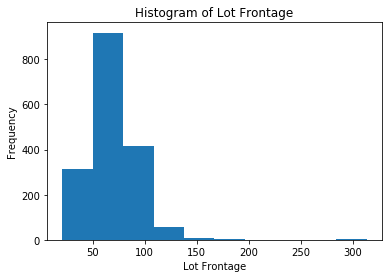

In [10]:
plt.hist(train['Lot Frontage'])
plt.title('Histogram of Lot Frontage')
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency');

330 null value in Lot Frontage is due to units with no Frontage. The distribution of Lot Frontage in the train data is not normally distributed, thus the null value is replaced by the median value of Lot Frontage.

Box Plot of Lot Frontage Before Fill Na showing distribution of data before fillna.

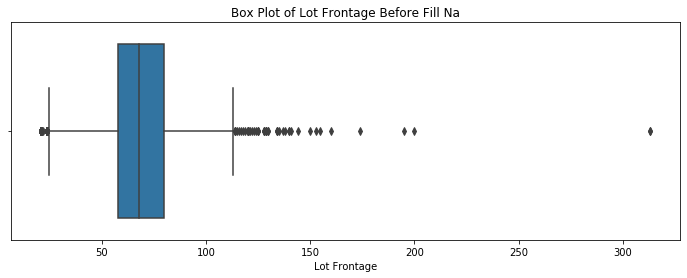

In [11]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h').set_title('Box Plot of Lot Frontage Before Fill Na')

In [12]:
train['Lot Frontage']=train['Lot Frontage'].fillna(value=train['Lot Frontage'].median())

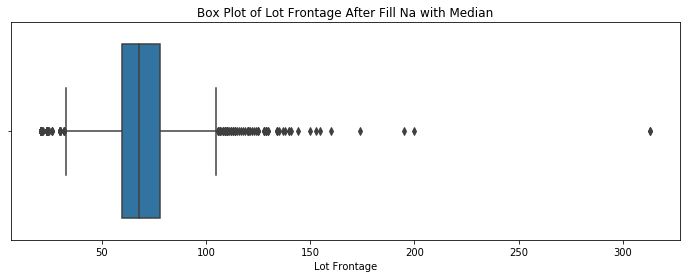

In [13]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h').set_title('Box Plot of Lot Frontage After Fill Na with Median')

Box Plot of Lot Frontage After Fill Na showing distribution of data after fillna.No major impact after fillna with Lot Frontage median.

1911 null value in Alley is due to units with no Alley acess. Alley column comprises categorial variable, thus the null values will be updated with value'NA'.

In [14]:
train['Alley']=train['Alley'].fillna(value='NA')

checking after train['Alley'] fillna with NA

In [15]:
train[train['Alley'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


The 22 null value in Mas Vnr Type & Mas Vnr Area are due to missing value. Null value for Mas Vnr Type is filled with the mode item 'None' while null value for Mas Vnr Area is filled with value '0' (corressponding value for None Mas Vnr Area).

In [16]:
# plt.hist(train['Mas Vnr Type'])
# plt.title('Histogram of Mas Vnr Type')
# plt.xlabel('Mas Vnr Type')
# plt.ylabel('Frequency');

Histogram of Mas Vnr Type shows there are high frequency in 'BrkFace' & None.

In [17]:
train['Mas Vnr Type']= train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])

In [18]:
train[train['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


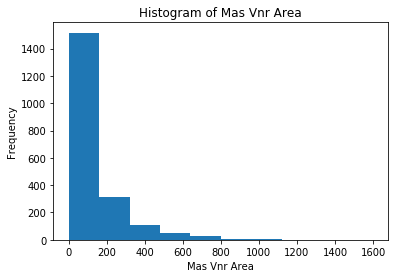

In [19]:
plt.hist(train['Mas Vnr Area'])
plt.title('Histogram of Mas Vnr Area')
plt.xlabel('Mas Vnr Area')
plt.ylabel('Frequency');

Histogram of Mas Vnr Area shows there are high frequency in '0'.

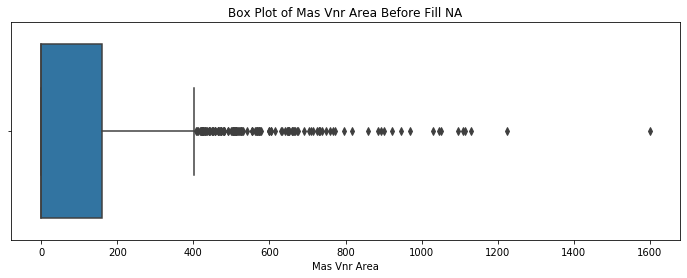

In [20]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h').set_title('Box Plot of Mas Vnr Area Before Fill NA')

Box Plot of Mas Vnr Area Before Fill Na showing distribution of data before fillna.

In [21]:
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(value=0)

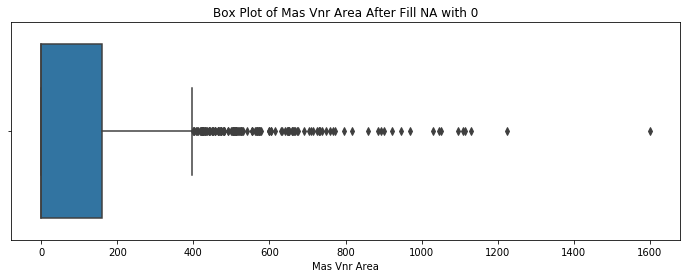

In [22]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h').set_title('Box Plot of Mas Vnr Area After Fill NA with 0')

Box Plot of Mas Vnr Area After Fill Na showing distribution of data after fillna.No major impact after fillna with value 0.

The 55 null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are due to housing with no basement. Null value for Bsmt Qual,Bsmt Cond & BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are filled with 'NA'.

In [23]:
# check_basement[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']]

In [24]:
check_basement=train[(train['Bsmt Qual'].isnull())&(train['Bsmt Cond'].isnull())&(train['BsmtFin Type 1'].isnull())&(train['Bsmt Exposure'].isnull())&(train['BsmtFin Type 2'].isnull())]
check_basement[['Id','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']]

,Id,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2
12,807,NaN,NaN,NaN,NaN,NaN
93,811,NaN,NaN,NaN,NaN,NaN
114,781,NaN,NaN,NaN,NaN,NaN
146,888,NaN,NaN,NaN,NaN,NaN
183,1554,NaN,NaN,NaN,NaN,NaN
240,2740,NaN,NaN,NaN,NaN,NaN
249,2242,NaN,NaN,NaN,NaN,NaN
256,2745,NaN,NaN,NaN,NaN,NaN
390,84,NaN,NaN,NaN,NaN,NaN
437,1501,NaN,NaN,NaN,NaN,NaN


In [25]:
train.update(train[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']].fillna('NA'))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [26]:
 train[(train['Id']==2338)|(train['Id']==2880)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1933,2338,527226010,60,RL,68.0,14762,Pave,NA,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0.0,0.0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2.0,672.0,TA,TA,P,120,144,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,169000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689


In [27]:
check_basement_2=train[(train['BsmtFin SF 1'].isnull())&(train['BsmtFin SF 2'].isnull())&(train['Bsmt Unf SF'].isnull())&(train['Total Bsmt SF'].isnull())]
check_basement_2[['Id','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

,Id,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,NaN,NaN,NaN,NaN


The 4 null value in BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are due to housing with no basement. Null value for BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are filled with '0.0'.

In [28]:
train.update(train[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(0.0))

check on last ID returned in queries above to ensure changes has been correctly made.

In [29]:
train[train['Id']==1342]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


The 2 null value in Bsmt Full Bath & Bsmt Half Bath are due to housing with no basement. Null value for Bsmt Full Bath & Bsmt Half Bath are filled with '0.0'.

In [30]:
check_basement_3=train[(train['Bsmt Full Bath'].isnull())&(train['Bsmt Half Bath'].isnull())]
check_basement_3[['Id','Bsmt Full Bath','Bsmt Half Bath']]

,Id,Bsmt Full Bath,Bsmt Half Bath
616,1498,NaN,NaN
1327,1342,NaN,NaN


In [31]:
train.update(train[['Bsmt Full Bath','Bsmt Half Bath']].fillna(0.0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [32]:
train[(train['Id']==1498)|(train['Id']==1342)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


Data cleaning for other 4 Garage columns (Garage Finish,Garage Qual,Garage Cond & Garage Yr Blt ) involved 114 columns. However, there are only 113 null value for Garage Type and one null value each for Garage Cars and Garage Area respectively. This is due to one of the properties only have informaation filled for Garage Type. 

In [33]:
train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Yr Blt'].isnull())&(train['Garage Type'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In this case properties with Id 2237 will have it's null value in Garage Cars and Garage Area be updated with Garbage Type: Detchd 'median.<br>
Garage Cars median by Garbage Type: Detchd =2
Garage Area median by Garbage Type: Detchd =400

In [34]:
#train.groupby('Garage Type')['Garage Cars'].median()

Garage Type
2Types     3.0
Attchd     2.0
Basment    2.0
BuiltIn    2.0
CarPort    2.0
Detchd     2.0
Name: Garage Cars, dtype: float64

In [35]:
#train.groupby('Garage Type')['Garage Area'].median()

Garage Type
2Types     779.0
Attchd     500.0
Basment    450.0
BuiltIn    544.5
CarPort    420.0
Detchd     400.0
Name: Garage Area, dtype: float64

In [36]:
# detchd_cars=train.loc[train['Garage Type']=='Detchd',['Id','Garage Type','Garage Cars']]
# detchd_cars.head(2)

,Id,Garage Type,Garage Cars
2,153,Detchd,1.0
4,255,Detchd,2.0


In [37]:
# detchd_area=train.loc[train['Garage Type']=='Detchd',['Id','Garage Type','Garage Area']]
# detchd_area.head(2)

,Id,Garage Type,Garage Area
2,153,Detchd,246.0
4,255,Detchd,484.0


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


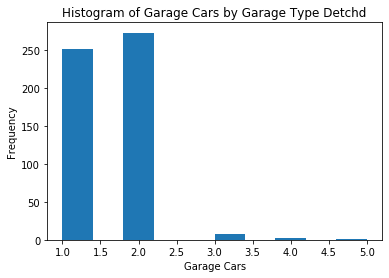

In [38]:
# plt.hist(detchd_cars['Garage Cars'])
# plt.title('Histogram of Garage Cars by Garage Type Detchd')
# plt.xlabel('Garage Cars')
# plt.ylabel('Frequency');

Histogram of Garage Cars by Garage Type Detchd shows there are high frequency for 1 & 2 cars.

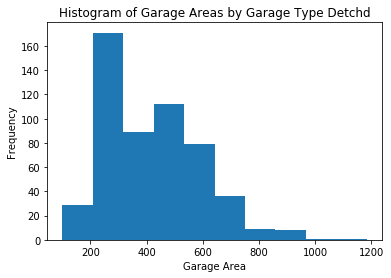

In [39]:
# plt.hist(detchd_area['Garage Area'])
# plt.title('Histogram of Garage Areas by Garage Type Detchd')
# plt.xlabel('Garage Area')
# plt.ylabel('Frequency');

Histogram of Garage Area by Garage Type Detchd shows there are high frequency around 300 Area.

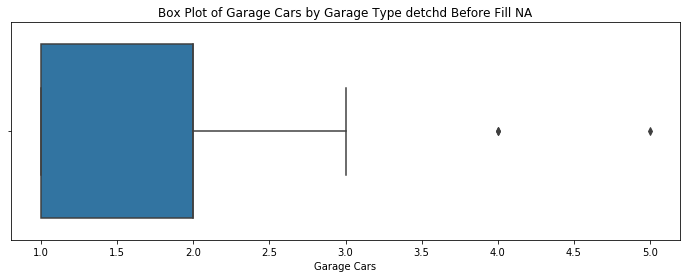

In [40]:
# fix, ax = plt.subplots(figsize=(12,4))
# ax= sns.boxplot(y='Garage Cars',data=detchd_cars,orient='h').set_title('Box Plot of Garage Cars by Garage Type detchd Before Fill NA')

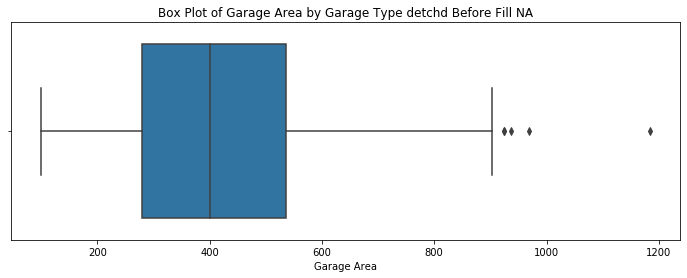

In [41]:
# fix, ax = plt.subplots(figsize=(12,4))
# ax= sns.boxplot(y='Garage Area',data=detchd_area,orient='h').set_title('Box Plot of Garage Area by Garage Type detchd Before Fill NA')

Update Id 2237 null value in Garage Cars and Garage Area as below:<br>
Garage Cars median by Garbage Type: Detchd =2 Garage Area median by Garbage Type: Detchd =400

In [42]:
# train.loc[train['Id']==2237,'Garage Cars']=2

In [43]:
# train.loc[train['Id']==2237,'Garage Area']=400

Check if the correct information has been updated at Id 2237

In [44]:
# train[train['Id']==2237]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,2.0,400.0,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


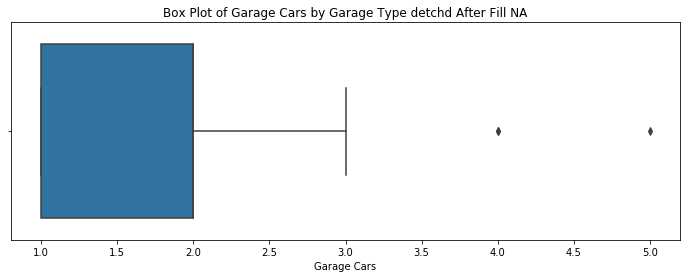

In [45]:
# fix, ax = plt.subplots(figsize=(12,4))
# ax= sns.boxplot(y='Garage Cars',data=detchd_cars,orient='h').set_title('Box Plot of Garage Cars by Garage Type detchd After Fill NA')

Box Plot of Garage Cars for Garage Type Detchd After Fill Na showing distribution of data after fillna.No major impact after fillna with median value: 2

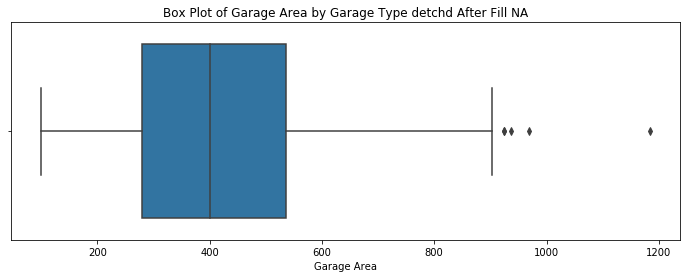

In [46]:
# fix, ax = plt.subplots(figsize=(12,4))
# ax= sns.boxplot(y='Garage Area',data=detchd_area,orient='h').set_title('Box Plot of Garage Area by Garage Type detchd After Fill NA')

Box Plot of Garage Area for Garage Type Detchd After Fill Na showing distribution of data after fillna.No major impact after fillna with median value: 400

The 4 null value in Garage Finish,Garage Qual,Garage Cond are due to housing with no garage.Null value for Garage Finish,Garage Qual,Garage Cond are filled with 'NA'.<br>


In [54]:
check_garage=train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())]
check_garage[['Id','Garage Finish','Garage Qual','Garage Cond']]

,Id,Garage Finish,Garage Qual,Garage Cond
28,2243,NaN,NaN,NaN
53,330,NaN,NaN,NaN
65,2278,NaN,NaN,NaN
79,2235,NaN,NaN,NaN
101,2084,NaN,NaN,NaN
103,728,NaN,NaN,NaN
114,781,NaN,NaN,NaN
120,1492,NaN,NaN,NaN
134,1514,NaN,NaN,NaN
136,216,NaN,NaN,NaN


In [48]:
# train.update(train[['Garage Finish','Garage Qual','Garage Cond']].fillna('NA'))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [49]:
# train[(train['Id']==2288)|(train['Id']==2842)]

19. The  null value in Garage Yr Blt is due to housing with no garage.Null value for Garage Yr Blt is filled with '0.0'.

In [50]:
# check_garage_2=train[(train['Garage Yr Blt'].isnull())]
# check_garage_2[['Id','Garage Yr Blt']]

In [51]:
# train.update(train[['Garage Yr Blt']].fillna(0.0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [52]:
# train[(train['Id']==2288)|(train['Id']==2842)]

In [53]:



Garage Type       113
Garage Cars         1
Garage Area         1


SyntaxError: invalid syntax (<ipython-input-53-26c1bdc44c57>, line 1)

20. In previous data cleaning for other Garage columns () involved 114 columns. However, there are only 113 null value for Garage Type and one null value each for Garage Cars and Garage Area respectively. This is due to one of the properties only have informaation filled for Garage Type. 

In [ ]:
# check_garage_3=train[(train['Garage Type'].isnull())]
# check_garage_3[['Id','Garage Type']]

In [ ]:
#fix, ax = plt.subplots(figsize=(8,5))
#ax= sns.boxplot(y='Lot Frontage',data=train,orient='h')
#xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
#ax.set_xticklabels(xlabels)
#ax.set_title('Sale Price for Different House Style');

# Add Columns, features

In [ ]:
#current_year=2019

In [ ]:
#train['Property Age']=current_year-train['Year Built']
#train['Property Age']

Check if there's any duplication row for 'ID'

In [ ]:
#train[train.duplicated(subset='Id', keep='first')]

List of Columns Index and Column Name

In [ ]:
#columns_list=train.columns.to_list()
#for c in enumerate (columns_list):
#    print(c)

In [ ]:
#for c in train.columns:
#    print ("---- %s ---" % c)
#    print(train[c].unique())
    

To view unique value,and unique value count for each columns

# EDA and Exploratory Visualizations

<font color=blue>Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?<br>
Are sufficient visualizations provided?<br>
Do plots accurately demonstrate valid relationships?<br>
Are plots labeled properly?<br>
Are plots interpreted appropriately?<br>
Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?<br>

Read the data dictionary.
Determine what missing values mean.
Figure out what each categorical value represents.
Identify outliers.
Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

Look at distributions.
Look at correlations.
Look at relationships to target (scatter plots for continuous, box plots for categorical).

1. Homeprice
2. Age of Home
3. Type of Home/dweling
4. Zoning 
5. Home Size
6. Year, Price, Sales type



Check target( SalePrice) distribution

In [ ]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax=sns.distplot(train['SalePrice'],kde=True,bins=100)
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Density Plot & Histogram for Train Data SalePrice')
# ax.set_xlabel('SalePrice')
# ax.set_ylabel('Density');

In [ ]:
# train.hist(figsize=(15, 15))
# plt.tight_layout();

In [ ]:
# fix, ax = plt.subplots(figsize=(18,8))
# ax= sns.boxplot(y='House Style',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different House Style');

In [ ]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='Bldg Type',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Building Type');

In [ ]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='MS SubClass',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Building Class');

In [ ]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='MS Zoning',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Zoning');

In [ ]:
# df_numeric = train.select_dtypes(exclude=['object'])
# df_obj = train.select_dtypes(include=['object']).copy()

In [ ]:
#df_ordinal.columns

In [ ]:
# df_numeric.columns

In [ ]:
# print(len(df_numeric.columns))

In [ ]:
# df_obj.columns

In [ ]:
# print(len(df_obj.columns))

In [ ]:
# for c in df_obj.columns:
#     print ("---- %s ---" % c)
#     print(df_obj[c].unique())

In [ ]:
# for c in df_obj:
#     df_obj[c] = pd.factorize(df_obj[c])[0]
#     print(c)

# Preprocessing

<font color=blue>
Are categorical variables one-hot encoded?<br>
Does the student investigate or manufacture features with linear relationships to the target?<br>
Have the data been scaled appropriately?<br>
Does the student properly split and/or sample the data for validation/training purposes?<br>
Does the student utilize feature selection to remove noisy or multi-collinear features?<br>
Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: linear regression, lasso, and ridge)?<br>
Does the student defend their choice of production model relevant to the data at hand and the problem?<br>
Does the student explain how the model works and evaluate its performance successes/downfalls?<br>

ordinal 

One-hot encode categorical variables.
Train/test split your data.
Scale your data.
Consider using automated feature selection.

In [ ]:
# df_numeric = train.select_dtypes(exclude=['object'])
# df_obj = train.select_dtypes(include=['object']).copy()

In [ ]:
# df_numeric.columns

In [ ]:
# print(len(df_numeric.columns))

In [ ]:
# df_obj.columns

In [ ]:
# print(len(df_obj.columns))

# Change & Map Ordinal Category Variable into Numeric

1. train['Exter Qual']

In [ ]:
# train['Exter Qual']=train['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Exter Qual'].dtypes)

2. train['Exter Cond']

In [ ]:
# train['Exter Cond']=train['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Exter Cond'].dtypes)

3. train['Bsmt Qual'], <br>
<font color=red>Ignored NA

In [ ]:
# train['Bsmt Qual']=train['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Bsmt Qual'].dtypes)

4. train['Bsmt Cond'],<br>
<font color=red>Ignored NA

In [ ]:
# train['Bsmt Cond']=train['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Bsmt Cond'].dtypes)

5. train['Bsmt Exposure'],<br>
<font color=red>Ignored NA

In [ ]:
# train['Bsmt Exposure']=train['Bsmt Exposure'].map({'Gd':4,'AV':3,'Mn':2,'No':1})
# print(train['Bsmt Exposure'].dtypes)

6. train['BsmtFin Type 1'],<br>
<font color=red>Ignored NA

In [ ]:
# train['BsmtFin Type 1']=train['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ ':2,'Unf':1})
# print(train['BsmtFin Type 1'].dtypes)

7. train['BsmtFin Type 2'],<br>
<font color=red>Ignored NA

In [ ]:
# train['BsmtFin Type 2']=train['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ ':2,'Unf':1})
# print(train['BsmtFin Type 2'].dtypes)

8. train['Heating QC'],<br>


In [ ]:
# train['Heating QC']=train['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Heating QC'].dtypes)

9. train['Central Air'],<br> Binary


In [ ]:
# train['Central Air']=train['Central Air'].map({'Y':1,'N':0})
# print(train['Central Air'].dtypes)

10. train['Kitchen Qual'],<br> 

In [ ]:
# train['Kitchen Qual']=train['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Kitchen Qual'].dtypes)

11. train['Fireplace Qu'],<br> 
<font color=red> ignore NA

In [ ]:
# train['Fireplace Qu']=train['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Fireplace Qu'].dtypes)

12. train['Garage Qual'],<br> 
<font color=red> ignore NA

In [ ]:
# train['Garage Qual']=train['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Garage Qual'].dtypes)

13. train['Garage Cond'],<br> 
<font color=red> ignore NA

In [ ]:
# train['Garage Cond']=train['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# print(train['Garage Cond'].dtypes)

14. train['Pool QC'],<br> 
<font color=red> ignore NA

In [ ]:
# train['Pool QC']=train['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1})
# print(train['Pool QC'].dtypes)

# pd.get_dummies for remaining object type & set df as full_train

In [ ]:
# full_train=pd.get_dummies(train,columns=['Lot Config','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Electrical','Functional','Garage Type','Garage Finish','Paved Drive','Fence','Misc Feature','Sale Type'],prefix=['lot_config','zon','rd_access','al_access','prop_shape','prop_flatness','utility','prop_slope','neigh','proxi_1','promxi_2','bldg_type','hse_style','r_style','r_mat','ex_1','ex_2','mas_type','found_','heat_','ele_','funct','garage_ty','garage_fin','paved_dr','fence','misc','sale_type'])

In [ ]:
# full_train.head(10)

In [ ]:
# full_train.shape

In [ ]:
# train.shape

In [ ]:
# full_train.head(2)

 Check on null values after dummy variables are created

In [ ]:
# null_columns_2=full_train.columns[full_train.isnull().any()]
# b=full_train[null_columns_2].isnull().sum()

pairplot for columns with null value to see if there is any correlationship between the predictor and target.

In [ ]:
# sns.pairplot(full_train, y_vars=['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Fireplace Qu','Garage Yr Blt','Garage Cars','Garage Area','Garage Qual','Garage Cond','Pool QC'], x_vars=['SalePrice'])

Decide to drop 2 columns 'Fireplace Qu' and 'Pool QC'

In [ ]:
# print(len(b))

In [ ]:
# null_columns=train.columns[train.isnull().any()]
# a=train[null_columns].isnull().sum()

In [ ]:
# a

In [ ]:
# print(len(a))

In [ ]:
###### sns.pairplot(train)

In [ ]:
##### columns_list=train.columns.to_list()
##### columns_list

In [ ]:
##### numeric_corr=df_numeric.corr()
##### obj_corr=df_obj.corr()

In [ ]:
# full_corr=full_train.corr()

In [ ]:
# fix, ax = plt.subplots(figsize=(50,50))
# mask = np.zeros_like(full_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(full_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":20})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

In [ ]:
#full_train.corr()['SalePrice'].sort_values()

In [ ]:
# features=full_corr.drop('SalePrice',1)
# target=full_corr['SalePrice']

In [ ]:
#Correlation with output variable
#cor_target = abs(cor["MEDV"])
# cor_target = abs(full_corr["SalePrice"])

In [ ]:
#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.4].sort_values(ascending=False)

# print(relevant_features.count())
# relevant_features

One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

In [ ]:
# relevant_X=full_train[['SalePrice','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Bsmt Qual','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','found__PConc','Mas Vnr Area','TotRms AbvGrd','Fireplaces','Heating QC','neigh_NridgHt','Bsmt Exposure','garage_fin_Unf','mas_type_None','BsmtFin SF 1','garage_fin_Fin','Pool QC']]

In [ ]:
# relevant_X.shape

In [ ]:
# relevant_X_corr=relevant_X.corr()

In [ ]:

# fix, ax = plt.subplots(figsize=(30,30))
# mask = np.zeros_like(relevant_X_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(relevant_X_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":25})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

In [ ]:
#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.4].sort_values(ascending=False)

# print(relevant_features.count())
# relevant_features

In [ ]:
#print(full_train[['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Bsmt Qual','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','found__PConc','Mas Vnr Area','TotRms AbvGrd','Fireplaces','Heating QC','neigh_NridgHt','Bsmt Exposure','garage_fin_Unf','mas_type_None','BsmtFin SF 1','garage_fin_Fin','Pool QC']].corr())

In [ ]:
#print(df[["LSTAT","PTRATIO"]].corr())
#print(df[["RM","LSTAT"]].corr())

# print(full_train[['Garage Area','Garage Cars','Garage Yr Blt','garage_fin_Unf','garage_fin_Fin']].corr())

In [ ]:
# sns.pairplot(full_train, x_vars=['Garage Area','Garage Cars','Garage Yr Blt','garage_fin_Unf','garage_fin_Fin'], y_vars=['SalePrice'])

Garage Area & Garage Cars highly corelated with each other. Hence we would keep only one variable and drop the other. We will keep Garage Area since its correlation with SalePrice is higher than that of Garage Cars.

<font color=blue> drop <br>
1. Garage Cars<br>
2. 
3. 

In [ ]:
# print(full_train[['Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1']].corr())

Correlationship of 'Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1' are not high, thus can be remained.

In [ ]:
# sns.pairplot(full_train, x_vars=['Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1'], y_vars=['SalePrice'])

Total Bsmt SF & 1st Flr SF highly corelated with each other. Hence we would keep only one variable and drop the other. We will keep Total Bsmt SF since its correlation with SalePrice is higher than that of 1st Flr SF.

In [ ]:
#print(full_train[['Year Built','Year Remod/Add']].corr())

# Modeling

Establish your baseline score.
Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
Fit lasso/ridge/elastic net with default parameters.
Go back and remove features that might be causing issues in your models.
Tune hyperparameters.
Identify a production model. (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
Refine and interpret your production model.

# Wrapper Method

# Backward Elimination

we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

# Inferential Visualizations

Look at feature loadings.
Look at how accurate your predictions are.
Is there a pattern to your errors? Consider reworking your model to address this.

# Business Recommendations

Which features appear to add the most value to a home?
Which features hurt the value of a home the most?
What are things that homeowners could improve in their homes to increase the value?
What neighborhoods seem like they might be a good investment?
Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

# Evaluation and Conceptual Understanding

<font color=blue>
Does the student accurately identify and explain the baseline score?<br>
Does the student select and use metrics relevant to the problem objective?<br>
Is more than one metric utilized in order to better assess performance?<br>
Does the student interpret the results of their model for purposes of inference?<br>
Is domain knowledge demonstrated when interpreting results?<br>
Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?<br>

# Conclusion and Recommendations

<font color=blue>
Does the student provide appropriate context to connect individual steps back to the overall project?<br>
Is it clear how the final recommendations were reached?<br>
Are the conclusions/recommendations clearly stated?<br>
Does the conclusion answer the original problem statement?<br>
Does the student address how findings of this research can be applied for the benefit of stakeholders?<br>
Are future steps to move the project forward identified?<br>